# Import

In [139]:
import os
import pathlib
import tensorflow as tf
import IPython.display as display
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [62]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

In [142]:
# Gets the bounding box for only the breast, centered on the y axis
def get_boundary(img):
    idx = 0
    right = 0
    left = 224
    for x in img.numpy():
        for y in x:
            idx += 1
            if y[0] >= 50 and idx > right:
                right = idx        
        idx = 224
        for y in reversed(x):
            idx -= 1
            if y[0] >= 50 and idx < left:
                left = idx
        idx = 0

    # bounding box
    y_min = (img.shape[0]-(right-left))//2
    x_min = left
    y_max = img.shape[0]-y_min
    x_max = right-left
    return x_min,y_min,x_max,y_max

In [143]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
def generate_image(data_dir, aug_type, aug_func, aug_params):
    sample_shown = False
    for class_name in CLASS_NAMES:
        images_path = list(data_dir.glob(class_name+'/*.png'))
        
        for image in images_path:
            try:
                img_name = str(image).split('/')[-1]
                img = tf.io.read_file(str(image))
                # Copy image to augmented directory
                fname = tf.constant('Augmented_Dataset/'+aug_type+'/'+class_name+'/'+img_name)
                fwrite = tf.io.write_file(fname, img)

                # Flip image and save
                img = tf.image.decode_png(img, channels=3)
                if aug_type == 'crop':
                    x_min,y_min,x_max,y_max = get_boundary(img)
                    im = Image.open(str(image))
                    im = im.crop((x_min,y_min,x_max,y_max))
                    im = im.resize((224,224))
                    im.save('Augmented_Dataset/'+aug_type+'/'+class_name+'/'+aug_type+'_'+img_name, "PNG")
                    
                    # Show sample
                    if sample_shown == False:
                        sample_shown = True
                        display.display(im)
                else:
                    aug_img = aug_func(img, *aug_params)
                    enc = tf.image.encode_png(aug_img)
                    fname = tf.constant('Augmented_Dataset/'+aug_type+'/'+class_name+'/'+aug_type+'_'+img_name)
                    fwrite = tf.io.write_file(fname, enc)

                    # Show sample
                    if sample_shown == False:
                        visualize(img, aug_img)
                        sample_shown = True

            except Exception as error:
                print(error)
                continue

# Create Directories

In [65]:
CLASS_NAMES = ['Density4Benign', 'Density1Benign', 'Density3Malignant', 'Density3Benign', 'Density4Malignant', 'Density2Benign', 'Density1Malignant', 'Density2Malignant']

augmentation_type = ['crop', 'vertical_flip', 'horizontal_flip', 'brightness']

In [66]:
def create_class_dir(aug_type):
    for class_name in CLASS_NAMES:
        try:
            os.mkdir(os.path.join('.','Augmented_Dataset/'+aug_type+'/'+class_name))
            print(class_name," directory created")
        except FileExistsError as error:
            print(error)
            continue

In [141]:
try:
    # Create Augmented Dataset directory
    path = os.path.join('.', 'Augmented_Dataset/')
    os.mkdir(path)
    print("Augmented_Dataset directory created")
except FileExistsError as error:
    print(error)

# Create subdirectories
for aug_type in augmentation_type:
    try:
        os.mkdir(os.path.join('.','Augmented_Dataset/'+aug_type))
        print(aug_type," directory created")
        create_class_dir(aug_type)        
    except FileExistsError as error:
        print(error)
        create_class_dir(aug_type)
        continue

[Errno 17] File exists: './Augmented_Dataset/'
crop  directory created
Density4Benign  directory created
Density1Benign  directory created
Density3Malignant  directory created
Density3Benign  directory created
Density4Malignant  directory created
Density2Benign  directory created
Density1Malignant  directory created
Density2Malignant  directory created
[Errno 17] File exists: './Augmented_Dataset/vertical_flip'
[Errno 17] File exists: './Augmented_Dataset/vertical_flip/Density4Benign'
[Errno 17] File exists: './Augmented_Dataset/vertical_flip/Density1Benign'
[Errno 17] File exists: './Augmented_Dataset/vertical_flip/Density3Malignant'
[Errno 17] File exists: './Augmented_Dataset/vertical_flip/Density3Benign'
[Errno 17] File exists: './Augmented_Dataset/vertical_flip/Density4Malignant'
[Errno 17] File exists: './Augmented_Dataset/vertical_flip/Density2Benign'
[Errno 17] File exists: './Augmented_Dataset/vertical_flip/Density1Malignant'
[Errno 17] File exists: './Augmented_Dataset/vertic

In [8]:
data_dir = './Dataset'
data_dir = pathlib.Path(data_dir)

# Generate and save vertical flip images

In [9]:
generate_image(data_dir, 'vertical_flip', tf.image.flip_up_down, [])

vertical_flip


# Generate and save horizontal flip images

In [10]:
generate_image(data_dir, 'horizontal_flip', tf.image.flip_left_right, [])

horizontal_flip


# Brightness

In [11]:
generate_image(data_dir, 'brightness', tf.image.adjust_brightness, [+0.3])

brightness


# Breast centered crop

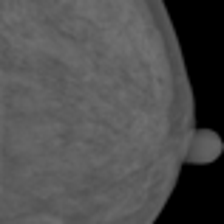

In [144]:
generate_image(data_dir, 'crop', tf.image.crop_to_bounding_box, [])